In [19]:
import Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Distributions")
Pkg.add("Turing")
Pkg.add("DiffEqBayes")
Pkg.add("ParameterizedFunctions")
Pkg.add("RecursiveArrayTools")
Pkg.add("DynamicHMC")
Pkg.add("ApproxBayes")
Pkg.add("Mamba")
Pkg.add("StatsPlots")

 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Res

In [8]:
using DifferentialEquations
using Distributions
using Turing
using DiffEqBayes
using ParameterizedFunctions
using RecursiveArrayTools

f1 = @ode_def LotkaVolterraTest1 begin
 dx = a*x - x*y
 dy = -3*y + x*y
end a

p = [1.5]
u0 = [1.0,1.0]
tspan = (0.0,10.0)
prob1 = ODEProblem(f1,u0,tspan,p)

σ = 0.01                         # noise, fixed for now
t = collect(range(1,10,length=10))   # observation times
sol = solve(prob1,Tsit5())

randomized = VectorOfArray([(sol(t[i]) + σ * randn(2)) for i in 1:length(t)])
data = convert(Array,randomized)

priors = [Truncated(Normal(1.5,0.1),0,2),Truncated(Normal(1.0,0.1),0,1.5),
          Truncated(Normal(3.0,0.1),0,4),Truncated(Normal(1.0,0.1),0,2)]

#bayesian_result_stan = stan_inference(prob1,t,data,priors;num_samples=300,
#                                num_warmup=500,likelihood=Normal,
#                                vars =(StanODEData(),InverseGamma(3,2)))

bayesian_result_turing = turing_inference(prob1,Tsit5(),t,data,priors;num_samples=500)

#bayesian_result_hmc = dynamichmc_inference(prob1, data, [Normal(1.5, 1)], t, [bridge(ℝ, ℝ⁺, )])

bayesian_result_abc = abc_inference(prob1, Tsit5(), t, data, [Normal(1.5, 1)];
                                num_samples=500)

┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /Users/hstrey/.julia/packages/Turing/vg86q/src/inference/hmc.jl:555
Sampling   0%|                               |  ETA: 0:10:20
  iteration:                     1
  n_steps:                       3
  is_accept:                     true
  acceptance_rate:               0.28581577024638305
  log_density:                   -13.353773238354115
  hamiltonian_energy:            24.486659312159418
  hamiltonian_energy_error:      0.6883762402748133
  max_hamiltonian_energy_error:  3567.91059508746
  tree_depth:                    1
  numerical_error:               true
  step_size:                     0.2
  nom_step_size:                 0.2
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0])












Sampling  10%|███                            |  ETA: 0:00:15
  iteration:                     48
  n_steps:                       19
  is_accept:                     true
  acceptance_rate:        

Preparing to run in serial on 1 processor
Preparing to run in serial on 1 processor


Total number of simulations: 1.76e+04
Cumulative number of simulations = [500, 4226, 7787, 9784, 11590, 13668, 15666, 17589]
Acceptance ratio: 2.84e-02
Tolerance schedule = [10.47, 5.28, 1.61, 0.51, 0.14, 0.06, 0.05, 0.04]

Median (95% intervals):
Parameter 1: 1.50 (1.50,1.50)


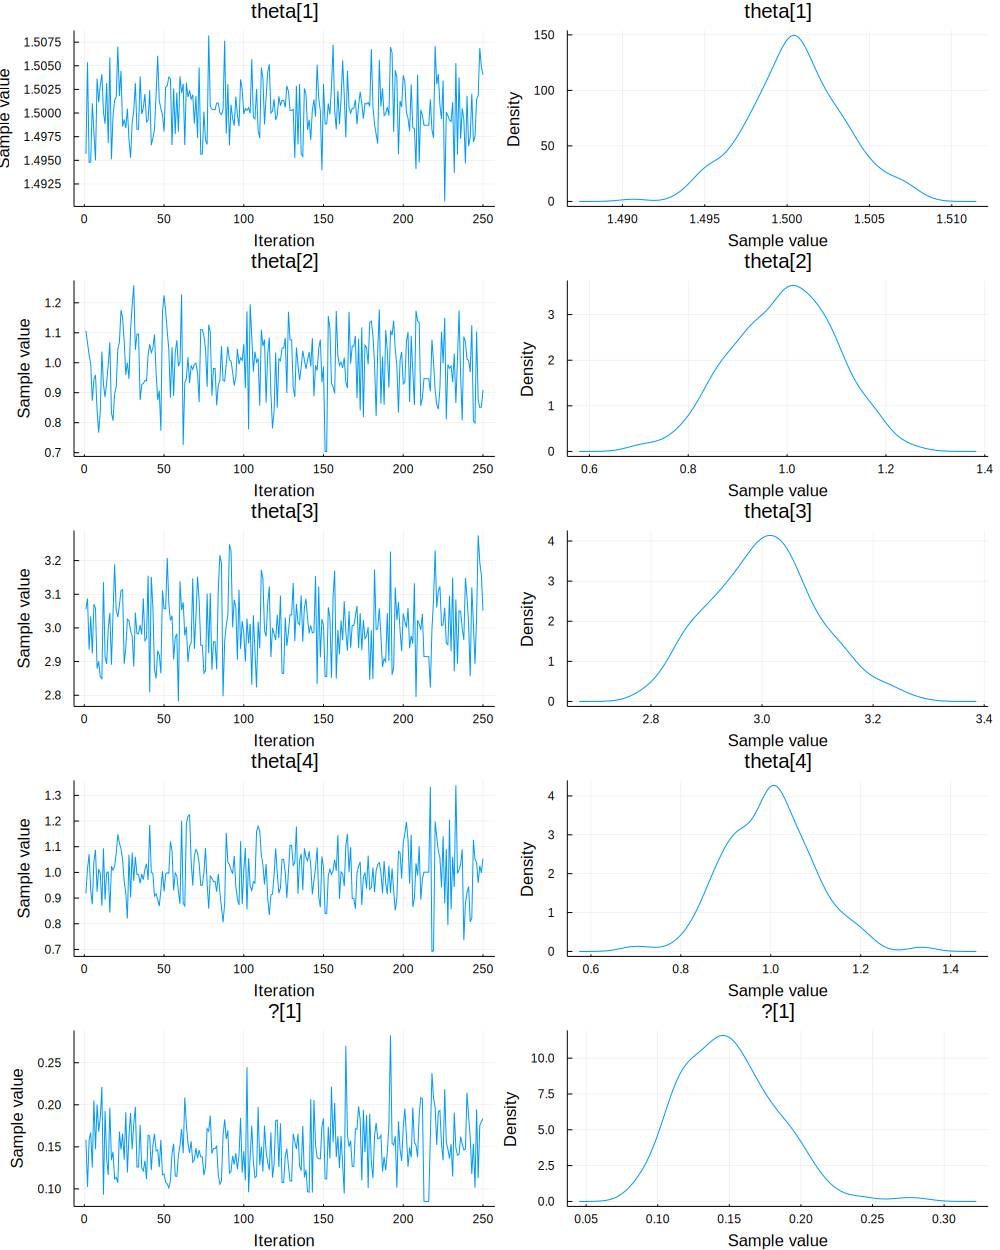

In [21]:
using StatsPlots
plot_chain(bayesian_result_turing)